In [1]:
import numpy as np
import pickle as pkl
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

/home/tbsexton/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [24]:
import numpy as np
import seaborn as sns;
import q_learn as ql
reload(ql)
import robbery as rb
reload(rb)

<module 'robbery' from 'robbery.py'>

In [89]:
# del q1, q2, q3, q4, game 
q1 = ql.Agent('p1')
q2 = ql.Agent('p2')
q3 = ql.Agent('p3')
q4 = ql.Agent('p4')

game = rb.Robbery('test', [5,5,5,5], *ql.Agent.get_agents())

In [90]:
game.playlist

(<q_learn.Agent instance at 0x7fe8704e2a28>,
 <q_learn.Agent instance at 0x7fe870601680>,
 <q_learn.Agent instance at 0x7fe870a84c68>,
 <q_learn.Agent instance at 0x7fe870768c68>)

In [91]:
valids1 = game.valid_moves(1)
valids1[np.random.choice(valids1.shape[0])]+game.state

array([5, 6, 5, 4])

In [92]:
valids1.shape

(4, 4)

In [93]:
test = np.zeros((10000,4))
game.state = (5,5,5,5)
for i in range(100):
    test[i]=game.harvest()
np.sum(test, axis=0)

array([ 23.,  14.,  18.,  18.])

In [94]:
(np.array([1,2,3,4,5,5,4,3,2,1])/36.).mean()

0.083333333333333343

In [95]:
game.harvest()

array([0, 1, 0, 0])

In [96]:
y = lambda x: np.ceil(2*np.cbrt(x-4))
y(80)

9.0

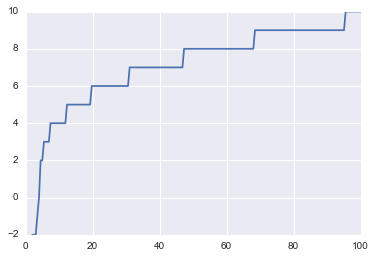

In [97]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(2,100,200), y(np.linspace(2,100,200)))

In [25]:
q1 = ql.Agent('p1')
q2 = ql.Agent('p2')
q3 = ql.Agent('p3')
q4 = ql.Agent('p4')

game = rb.Robbery('test', [2,2,2,2], *ql.Agent.get_agents())

In [61]:
from tqdm import tqdm
for i in tqdm(range(100000)):
    game.reset()
    game.play()

In [62]:
len(q1.Q.keys())

9958

In [63]:
states = q1.Q.keys()
control = []
for state in q1.Q.keys():
    policy = max(q1.Q[state].iterkeys(), key=(lambda key: q1.Q[state][key]))
    control+=[str(policy)]
control = np.array(control)

In [64]:
# from sklearn import svm
# clf = svm.SVC()
# clf.fit(np.array(states), np.array(control))

In [65]:
who_rob = np.zeros(len(control))
who_rob[control!='(0, 0, 0, 0)']=1
who_rob[who_rob!=1]=0
print who_rob.sum()

6373.0


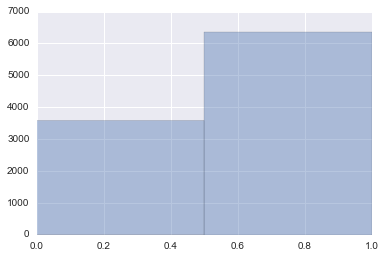

In [66]:
sns.distplot(who_rob, bins=2, kde=False)

In [67]:

lr = LogisticRegression()
lr.fit(states, control)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

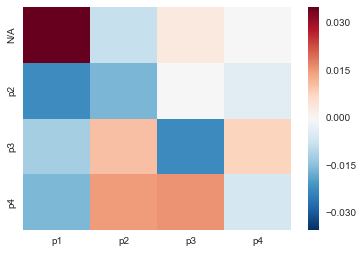

In [68]:

sns.heatmap(lr.coef_, yticklabels=['N/A', 'p2', 'p3', 'p4'], xticklabels=['p1','p2', 'p3', 'p4'])

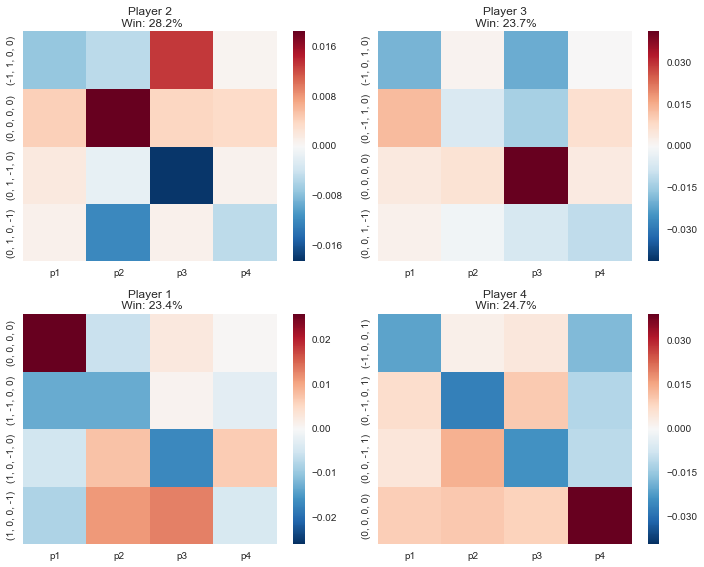

In [69]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,8))

for n,player in enumerate(ql.Agent.get_agents()):
    states = player.Q.keys()
    control = []
    for state in player.Q.keys():
        policy = max(player.Q[state].iterkeys(), key=(lambda key: player.Q[state][key]))
        control+=[str(policy)]
    control = np.array(control)
#     able_to_rob = ['p1', 'p2', 'p3', 'p4']
#     able_to_rob[n] = 'N/A'
    lr = LogisticRegression(class_weight='balanced',
                            multi_class='multinomial',
                            solver='lbfgs')
    lr.fit(states, control)
    
    controls = lr.classes_.tolist()
    sns.heatmap(lr.coef_, ax = ax.flatten()[n],
                yticklabels = controls,
                xticklabels = ['p1','p2', 'p3', 'p4'])
    winpct = 100.*float(player.wins)/player.games_played
    ax.flatten()[n].set_title('Player {0:.0f}\n Win: {1:.1f}%'.format(controls.index('(0, 0, 0, 0)')+1,
                                                                                   winpct))

#     ax.flatten(order='F')[n].set_title('Player'+str(n+1)+'\nWins: {0:.0f}'.format(player.wins))
plt.tight_layout()

In [16]:
lr.classes_


array(['(-1, 0, 0, 1)', '(0, -1, 0, 1)', '(0, 0, -1, 1)', '(0, 0, 0, 0)'], 
      dtype='|S13')

In [71]:

for i in ql.Agent.get_agents():
    with open(i.str+'_250k_table.txt', 'w') as f:
        pkl.dump(i.Q, f)

In [5]:
for i in ql.Agent.get_agents():
    with open(i.str+'_250k_table.txt', 'rb') as f:
        i.Q = pkl.load(f)

In [211]:
lr.

array([ 3.25,  8.  ,  5.5 , ...,  5.  ,  3.75,  4.  ])

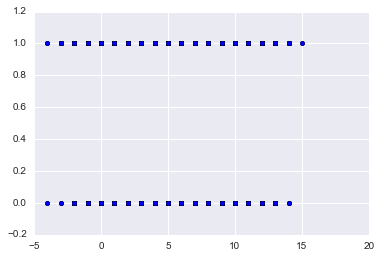

In [217]:
plt.scatter(np.array(q1.Q.keys())[:,0],who_rob)


In [229]:
np.array(q1.Q.keys())[who_rob==0].shape

(6938, 4)

In [164]:
def autolabel(rects, ax):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

def wealth_dist_act(player):
    states = player.Q.keys()
    control = []
    for state in states:
        policy = max(player.Q[state].iterkeys(), key=(lambda key: player.Q[state][key]))
        control+=[str(policy)]
    control = np.array(control)

    who_rob = np.zeros(len(control))
    who_rob[control!='(0, 0, 0, 0)']=1
    who_rob[who_rob!=1]=0
    print who_rob.sum()
    
    ind = np.arange(10)
    width = 0.35
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
    for n,i in enumerate(ax.flatten()):
#         sns.distplot(np.array(states)[who_rob==0][:,n], ax=i, label='Peaceful', kde=False)
#         sns.distplot(np.array(states)[who_rob==1][:,n], ax=i, label='Robber', kde=False)
#         sns.jointplot(np.array(states)[who_rob==0][:,n], 
#                       np.array(states)[who_rob==1][:,n],
#                      ax=i, kind='hex' )
        
        allers = np.array(states)[:,n]
        robber = allers[who_rob==1]
        peacer = allers[who_rob==0]
        P_rob = float(robber.size)/allers.size
#         print robber.size
        
        all_hist, dex = np.histogram(allers, 10, normed=True)
#         print all_hist
        rob_hist, dex = np.histogram(robber, 10, normed=True)
        pea_hist, dex = np.histogram(peacer, 10, normed=True)
        
        P_robGw = rob_hist*P_rob/all_hist
        P_peaGw = pea_hist*(1-P_rob)/all_hist
#         print P_robGw
        rects1 = i.bar(ind, P_robGw, width, 
                       color=sns.xkcd_rgb["denim blue"], 
                       label='Robber')
        rects2 = i.bar(ind + width, P_peaGw, width, 
                       color=sns.xkcd_rgb["medium green"], 
                       label='Peaceful')
#         i.hist([np.array(states)[who_rob==0][:,n],
#                 np.array(states)[who_rob==1][:,n]],
#                10, align = 'right',normed=1, histtype='bar', label=['peaceful', 'robber'])
        i.set_xticks(ind + width)
        i.set_xticklabels(range(11))
#         autolabel(rects1, i)
#         autolabel(rects2, i)
        i.legend(loc=0)
        i.set_title('Player {} Wealth Dist'.format(n+1))
    fig.suptitle('Player {} Action Probability by Player Wealth'.format(player.order+1), size=16)

6375.0


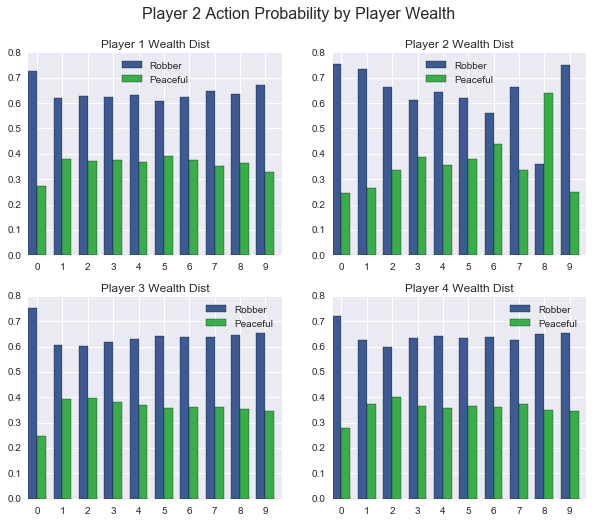

In [168]:
wealth_dist_act(q2)
# plt.bar()


In [7]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, init='pca')
proj = model.fit_transform(np.array(states))

In [17]:
np.array(states).shape

(23863, 4)

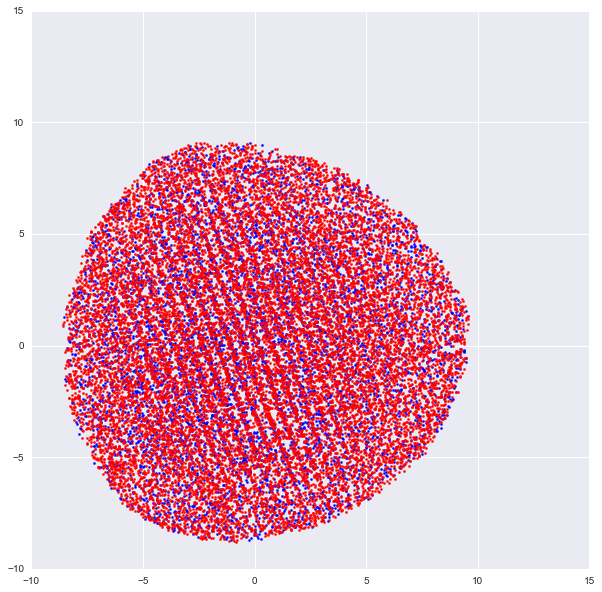

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0][control=='(0, 0, 0, 0)'], proj[:,1][control=='(0, 0, 0, 0)'], marker='.', color='b')
plt.scatter(proj[:,0][control!='(0, 0, 0, 0)'], proj[:,1][control!='(0, 0, 0, 0)'], marker='.', color='r')

In [20]:
from sklearn.decomposition import PCA
model = PCA(n_components=2, whiten=True)
proj = model.fit_transform(np.array(states))

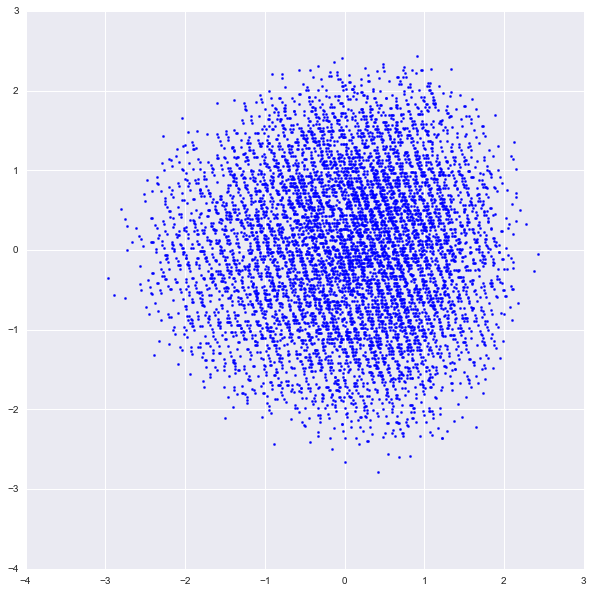

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0][control=='(0, 0, 0, 0)'], proj[:,1][control=='(0, 0, 0, 0)'], marker='.', color='b')
# plt.scatter(proj[:,0][control!='(0, 0, 0, 0)'], proj[:,1][control!='(0, 0, 0, 0)'], marker='.', color='r')

In [23]:
from sklearn.manifold import SpectralEmbedding
model = SpectralEmbedding(n_components=2)
proj = model.fit_transform(np.array(states))

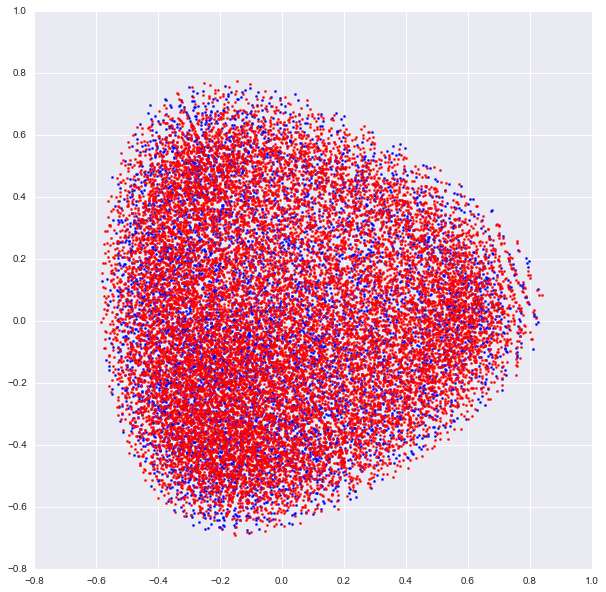

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0][control=='(0, 0, 0, 0)'], proj[:,1][control=='(0, 0, 0, 0)'], marker='.', color='b')
plt.scatter(proj[:,0][control!='(0, 0, 0, 0)'], proj[:,1][control!='(0, 0, 0, 0)'], marker='.', color='r')

In [49]:
X=np.array(states)
st2 = X[:,1]
sop = X[:,[0,2,3]]

mask = np.unique([tuple(sorted(l)) for l in sop], return_index=True)

mask

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0, 13, 15,  1,  2,  6, 19,  7,  5, 11,  8]))

In [50]:
[tuple(sorted(l)) for l in sop]

[(0, 3, 4),
 (0, 4, 8),
 (5, 7, 10),
 (4, 8, 9),
 (0, 1, 7),
 (2, 3, 7),
 (4, 6, 8),
 (5, 6, 8),
 (0, 5, 9),
 (1, 4, 5),
 (6, 8, 10),
 (2, 4, 9),
 (2, 5, 9),
 (1, 7, 8),
 (3, 4, 8),
 (5, 8, 10),
 (2, 4, 5),
 (1, 7, 7),
 (6, 6, 10),
 (5, 7, 8),
 (1, 6, 8),
 (0, 1, 3),
 (3, 5, 7),
 (6, 6, 9),
 (0, 4, 6),
 (3, 3, 5),
 (3, 6, 7),
 (6, 7, 9),
 (4, 6, 7),
 (5, 6, 7),
 (1, 4, 5),
 (2, 9, 9),
 (4, 4, 5),
 (2, 3, 8),
 (6, 6, 6),
 (2, 5, 7),
 (0, 3, 3),
 (3, 8, 8),
 (1, 1, 6),
 (1, 4, 5),
 (3, 5, 7),
 (5, 6, 8),
 (8, 8, 8),
 (5, 6, 7),
 (4, 5, 6),
 (3, 7, 9),
 (8, 9, 9),
 (8, 9, 10),
 (2, 4, 9),
 (1, 7, 8),
 (5, 5, 7),
 (4, 4, 8),
 (1, 5, 9),
 (6, 7, 8),
 (1, 1, 8),
 (3, 5, 8),
 (2, 6, 8),
 (6, 6, 10),
 (2, 3, 8),
 (1, 1, 7),
 (1, 2, 8),
 (3, 4, 5),
 (1, 4, 5),
 (3, 9, 9),
 (2, 3, 10),
 (1, 9, 10),
 (3, 5, 5),
 (2, 2, 9),
 (0, 2, 4),
 (5, 6, 7),
 (2, 6, 6),
 (5, 7, 10),
 (0, 3, 7),
 (4, 6, 9),
 (7, 7, 8),
 (1, 2, 5),
 (2, 4, 4),
 (7, 8, 10),
 (4, 5, 6),
 (4, 7, 8),
 (1, 6, 9),
 (4, 5, 6),
 (2, 4